# Module 8 - Nearest Neighbour Methods

## Module Overview

- Revisit the bias-variance trade-off
- Focus on K-Nearest neighbours
    - Different ways of determining distance between points:
        - Euclidean
        - Minkowski
        - Manhattan
    - Scaling
        - Min-max normalisation
        - Z-score normalisation (standardisation)
    - How choose the $k$ value
    - Discussion on the curse of dimensionality (and hypercubes)

## Learning outcomes

- LO1: Calculate distance functions for k-nearest neighbours methods.
- LO2: Apply normalisation methods to scale data sets.
- LO3: Predict and select the value of $k$ for regression and classification problems using validation and test sets.
- LO4: Recognise how the curse of dimensionality can impact the validity of distancebased methods that use high-dimensional training data.

## Misc and Keywords

- **Bias** refers to the error introduced by approximating a real-world problem with a simplified model. A model with high bias makes strong assumptions about the data, leading to underfitting (failing to capture the complexity of the data). Conversely, a model with low bias makes fewer assumptions and can adapt better to the data.
- **Ordinal categorical variables**  have a natural order or ranking between categories, but the differences between them are not necessarily consistent.
    - **Example**: "Hot", "Medium", "Cold" (these can be ordered, but the difference between "Hot" and "Medium" may not be the same as between "Medium" and "Cold").
    - Ordinal variables can indeed be labelled as 1, 2, 3, or any other scale that represents the order, though the exact labels can vary depending on the context. For instance, "Cold" might be 1, "Medium" 2, and "Hot" 3.
- **Nominal categorical variables** have no natural order or ranking.
    - **Example**: "Counties", "Colors", "Gender" (There’s no inherent order among the categories like "County 1" < "County 2").
    - These variables are typically one-hot encoded when used as predictors in machine learning models, where each category gets a separate binary column (0 or 1). For example, if you have three counties, you might create three binary features (one for each county), where only one will have a 1 and the others will have 0.


## Module Summary Description

## Bias-Variance Trade off
- The bias-variance tradeoff is a fundamental concept in machine learning that describes the balance between two sources of error that affect a model’s performance:
    - Bias: The error due to overly simplistic assumptions in the learning algorithm.
        - High bias leads to underfitting, where the model is too simple to capture the underlying pattern in the data.
        - Example: A linear regression model trying to fit a highly non-linear dataset.
    - Variance: The error due to the model being too sensitive to small fluctuations in the training data.
        - High variance leads to overfitting, where the model learns noise instead of the actual pattern.
        - Example: A k-NN model with k=1, which memorises training data but fails to generalise to new inputs.
- **The Tradeoff**
    - If a model has high bias and low variance, it is too simple and makes a lot of errors regardless of the dataset (underfitting).
    - If a model has low bias and high variance, it is too complex and adapts too much to the training data, making errors when predicting unseen data (overfitting).
    - The goal is to find a balance: a model with both low bias and low variance, which generalises well to new data.
Graphical Intuition
- **Visualising the bias-variance tradeoff**
    -  $total error = Bias^2 + Variance + Irreducible Error$
        - $Bias$ squared represents the error due to incorrect assumptions.
        - $Variance$ represents how much the model output varies with different training sets.
        - $Irreducible error$ is due to noise in the data itself and cannot be eliminated.
        - Example: Bias-Variance in k-NN
            - Low $k$ (e.g., k=1) → Low bias, high variance (memorises training data, overfits).
            - High $k$ (e.g., k=50) → High bias, low variance (smooths the decision boundary too much, underfits).
            - A medium $k$ (e.g., 5-10) often provides a good tradeoff.
- **How to Address the Bias-Variance Tradeoff?**
    - Reduce Bias (Underfitting)
        - Use more complex models (e.g., from linear to polynomial regression).
        - Increase the number of features or use better feature engineering.
        - Reduce regularisation (if using Lasso or Ridge regression).
    - Reduce Variance (Overfitting)
        - Use simpler models (e.g., increasing $k$ in k-NN).
        - Use regularisation techniques (L1, L2, dropout in deep learning).
        - Increase the size of the training dataset.
        - Use bagging or ensemble methods (Random Forest, boosting).


## K-Nearest Neighbours

### Introduction
- All machine learning methods have a bias, and this is essential for learning
- The underlying bias of KNN is the assumption that similar inputs lead to similar outputs.
- Consquently, need to measure the similarity of data samples, this is done in 3 steps
    - Convert categorical to numerical
    - Normalise numerical such that they have the same scale
    - Measure the distances between these numerical features
- When trying to assign a new data point you look at the KNNs and select the majority category amongst the $k$ training samples.
- The k-Nearest Neighbors (KNN) algorithm determines similarity between data points based on distance. The most commonly used distance metric is the **q-norm**, defined as:  
$$ d(\mathbf{x}, \mathbf{y}) = \left( \sum_{i=1}^{n} |x_i - y_i|^q \right)^{\frac{1}{q}} $$  
- **Special cases include**  
    - **Manhattan Distance** ($ q = 1 $):  
        - Measures the total absolute difference across all dimensions. It is useful when movement is restricted to grid-like paths, such as in city blocks. 
      $$ d_1(\mathbf{x}, \mathbf{y}) = \sum_{i=1}^{n} |x_i - y_i| $$  
    - **Euclidean Distance** ($ q = 2 $):  
        - The straight-line (as-the-crow-flies) distance between two points. This is the most commonly used metric in machine learning.  
      $$ d_2(\mathbf{x}, \mathbf{y}) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2} $$  
    - **Maximum Distance (Chebyshev Distance)** ($ q \to \infty $):  
        - Measures the greatest absolute difference along any single dimension. It is useful in scenarios where movement is restricted to uniform steps in any direction.  
      $$ d_\infty(\mathbf{x}, \mathbf{y}) = \max_{i} |x_i - y_i| $$  

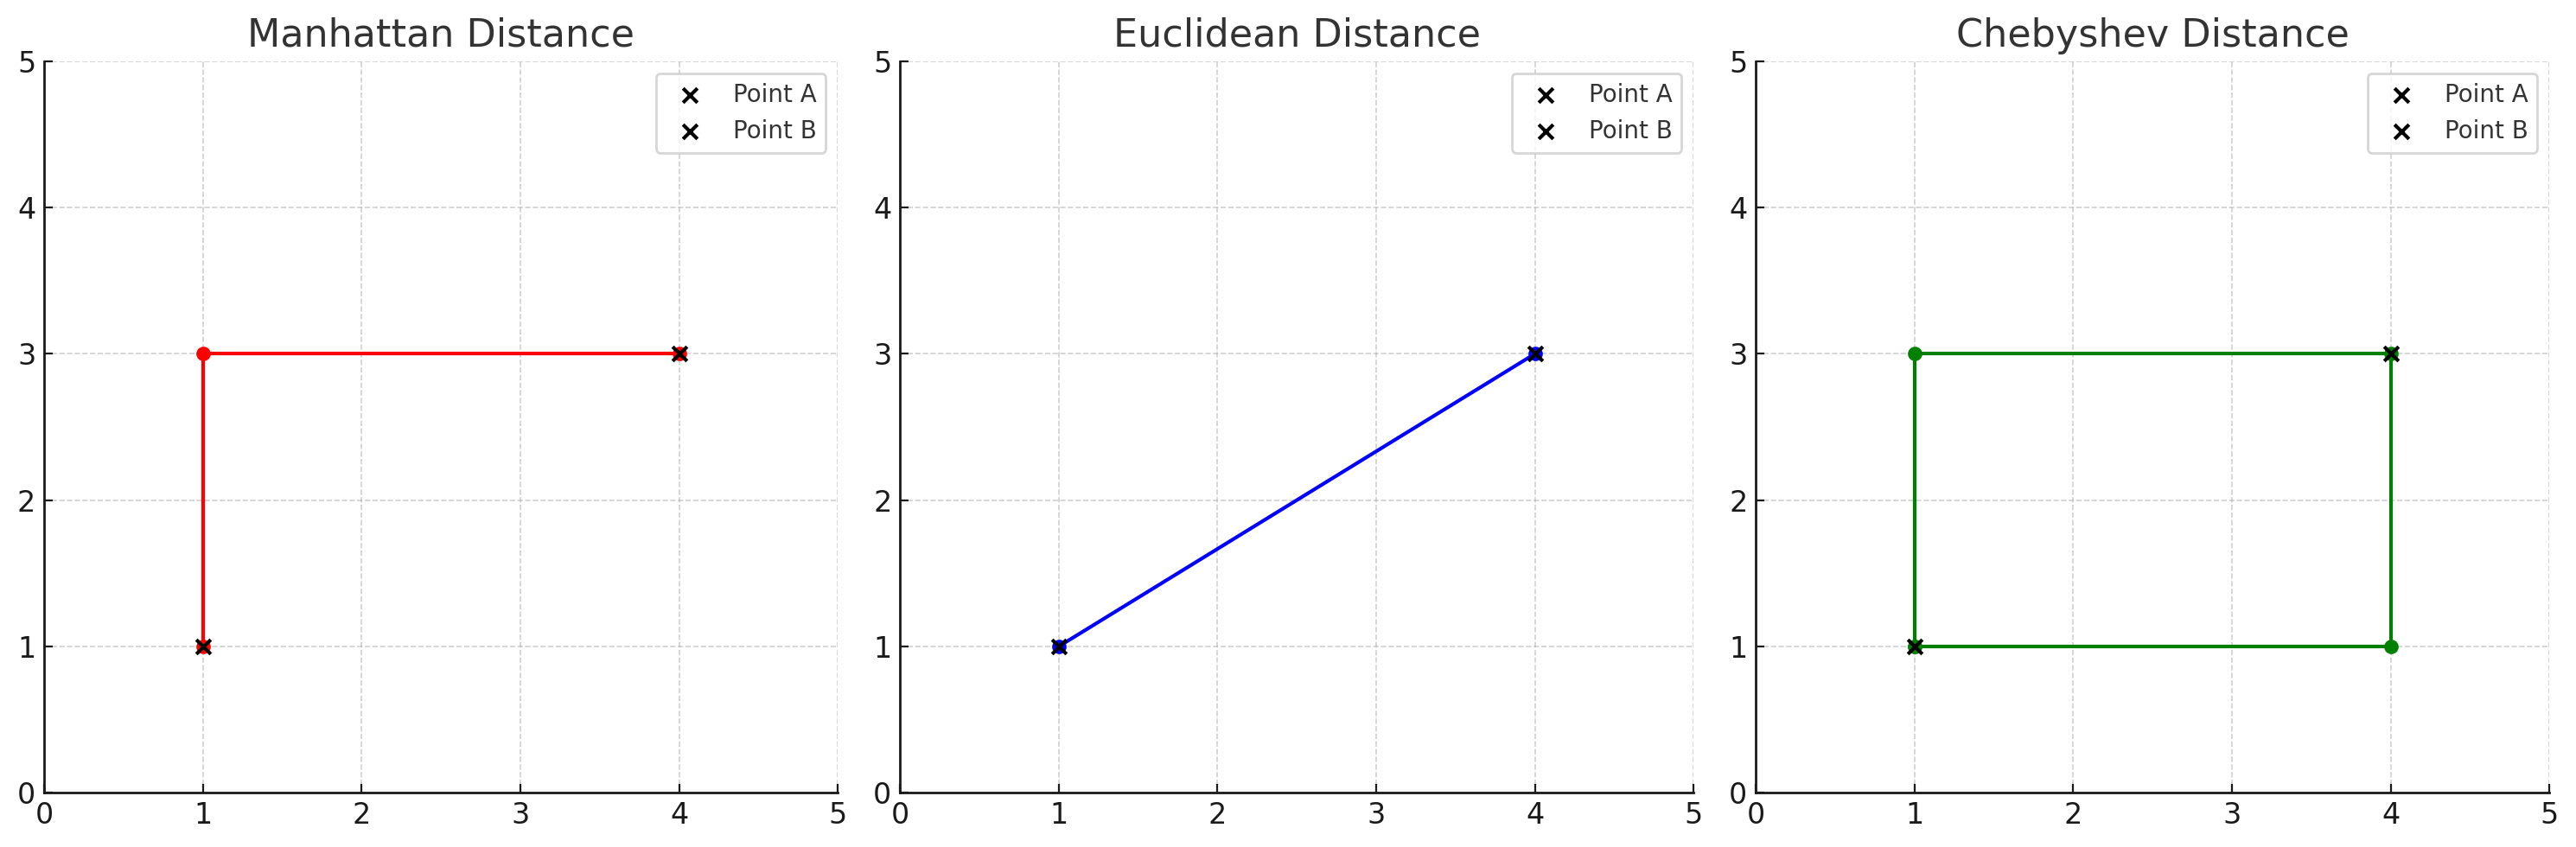

In [53]:
import numpy as np

def convert_to_numeric(p):
    return np.array([x if isinstance(x, (int, float)) else 0 for x in p])
    
def manhattan_dist(p1, p2):
    if len(p1) != len(p2):
        return 0.0
    # Convert to NumPy array and filter only numeric values
    numeric_p1 = convert_to_numeric(p1)
    numeric_p2 = convert_to_numeric(p2)
    return round(np.sum(np.abs(numeric_p1 - numeric_p2)), 4)

def euclidean_dist(p1, p2):
    if len(p1) != len(p2):
        return 0.0
    # Convert to NumPy array and filter only numeric values
    numeric_p1 = convert_to_numeric(p1)
    numeric_p2 = convert_to_numeric(p2)
    return round(np.sqrt(np.sum(np.power(np.abs(numeric_p1 - numeric_p2),2))), 4)

def maximum_dist(p1, p2):
    if len(p1) != len(p2):
        return 0.0
    # Convert to NumPy array and filter only numeric values
    numeric_p1 = convert_to_numeric(p1)
    numeric_p2 = convert_to_numeric(p2)
    return round(np.max(np.abs(numeric_p1 - numeric_p2)), 4)


p1 = [1,1,1,'yes']
p2 = [1, 1.2, 3.8,'no']

print(manhattan_dist(p1, p2))
print(euclidean_dist(p1, p2))
print(maximum_dist(p1, p2))

3.0
2.8071
2.8


### Scaling

- Normalisation is used to scale numerical data into a standard range or distribution, improving performance in machine learning models.
- Any scaling data applied to training data, should also be applied to new data
- Two common methods are:  
#### **1. Min-Max Normalisation**  
- Min-Max normalisation scales data to a fixed range, typically \([0,1]\) or \([-1,1]\). It is useful when the data is roughly **uniformly distributed** and has known bounds.  Defined as:
$$ x' = \frac{x - x_{\min}}{x_{\max} - x_{\min}} $$  
- Where:  
    - $x$ is the original value  
    - $x_{\min}$ is the minimum value in the dataset  
    - $x_{\max}$ is the maximum value in the dataset  
    - $x'$ is the normalised value  

#### **2. Z-Score normalisation (Standardisation)**  
- Z-score normalisation (or standardisation) transforms data to have **zero mean** and **unit variance**. It is useful when the data contains **outliers**, as it reduces their influence. Defined as:
$$ x' = \frac{x - \mu}{\sigma} $$  
- Where:  
    - $x$ is the original value  
    - $\mu$ is the mean of the dataset  
    - $\sigma$ is the standard deviation of the dataset  
    - $x'$ is the standardised value  
- Min-max normalisation is preferred when maintaining original data relationships is important, while z-score normalisation is better for handling outliers and normally distributed data.


In [55]:
import numpy as np

def min_max(points, col, x_=None):
    # Verification
    if col < 0 or col >= points.shape[1]:  # Fixed column check
        return 0.0
    
    # Select column
    x = points[:, col]
    
    # Compute min/max
    min_x, max_x = np.min(x), np.max(x)
    
    # Avoid division by zero
    if max_x == min_x:
        return 0.0 if x_ is not None else np.zeros_like(x)
    
    # If new sample, normalise it, else normalise full column
    if x_ is None:
        return np.round((x - min_x) / (max_x - min_x), 4)
    else:
        return np.round((x_[col] - min_x) / (max_x - min_x), 4)

def z_score(points, col, x_=None):
    # Verification
    if col < 0 or col >= points.shape[1]:  # Fixed column check
        return 0.0
    
    # Select column
    x = points[:, col]
    
    # Compute mean/std
    mean_x, std_x = np.mean(x), np.std(x)
    
    # Avoid division by zero
    if std_x == 0:
        return 0.0 if x_ is not None else np.zeros_like(x)
    
    # If new sample, normalise it, else normalise full column
    if x_ is None:
        return np.round((x - mean_x) / std_x, 4)
    else:
        return np.round((x_[col] - mean_x) / std_x, 4)

# Sample dataset
points = np.array([
    [1.3, 5.1, 3.1], 
    [5.2, 3.8, 2.9],
    [100.8, 4.2, 1.4],
    [2.7, 1.1, 4.1],
    [3.1, -123.2, 3]
])

# Normalise training data
print("Min-Max Normalisation (Column 0):", min_max(points, 0))
print("Z-score Normalisation (Column 1):", z_score(points, 1))

# Normalise a new sample
new_sample = [0.8, 5.5, 2.8]
print("Min-Max Normalised Sample (Column 0):", min_max(points, 0, new_sample))
print("Z-score Normalised Sample (Column 1):", z_score(points, 1, new_sample))

Min-Max Normalisation (Column 0): [0.     0.0392 1.     0.0141 0.0181]
Z-score Normalisation (Column 1): [ 0.5304  0.5048  0.5126  0.4515 -1.9993]
Min-Max Normalised Sample (Column 0): -0.005
Z-score Normalised Sample (Column 1): 0.5383


### Binary And Categorical Problems
- KNN strongly relies on the concept of proximity and the use of distance functions to measure proximity, it is therefore necessary to convert binary and categorial data into numerical representations
- For binary data, simply convert them into 0 and 1 values
- For categorical data simply replace each unique category with a numerical class

### How to Choose K
##### 1. Small $k$ → Overfitting  
- The model closely follows the training data, leading to a complex and jagged decision boundary.  
- This results in **high variance**, meaning the model is highly sensitive to small changes in data and does not generalise well to unseen data.  
##### 2. Large $k$ → Underfitting  
- The decision boundary becomes too smooth, losing important details of the data distribution.  
- This leads to **high bias**, meaning the model is too simplistic and may fail to capture meaningful patterns in the data.  
##### 3. Choosing $k$ Wisely  
- **Avoid fixed rules of thumb** because different datasets have different noise levels, densities, and distributions.  
- Instead, use **data-driven methods** such as:  
  - **Cross-validation**: Splitting the dataset multiple times to find the optimal $k$.  
  - **Train-validation-test split**: Selecting $k$ using a validation set, then evaluating on a test set.  
  - **Elbow method**: Plotting error vs. $k$ and selecting the point where error stabilises.  
##### 4. Bias-Variance Trade-off  
- A balance is needed:  
  - **Small $k$** → **High variance, low bias** (too complex, overfitting).  
  - **Large $k$** → **Low variance, high bias** (too simple, underfitting).  
- The goal is to find a **middle ground where both bias and variance are minimised**. 


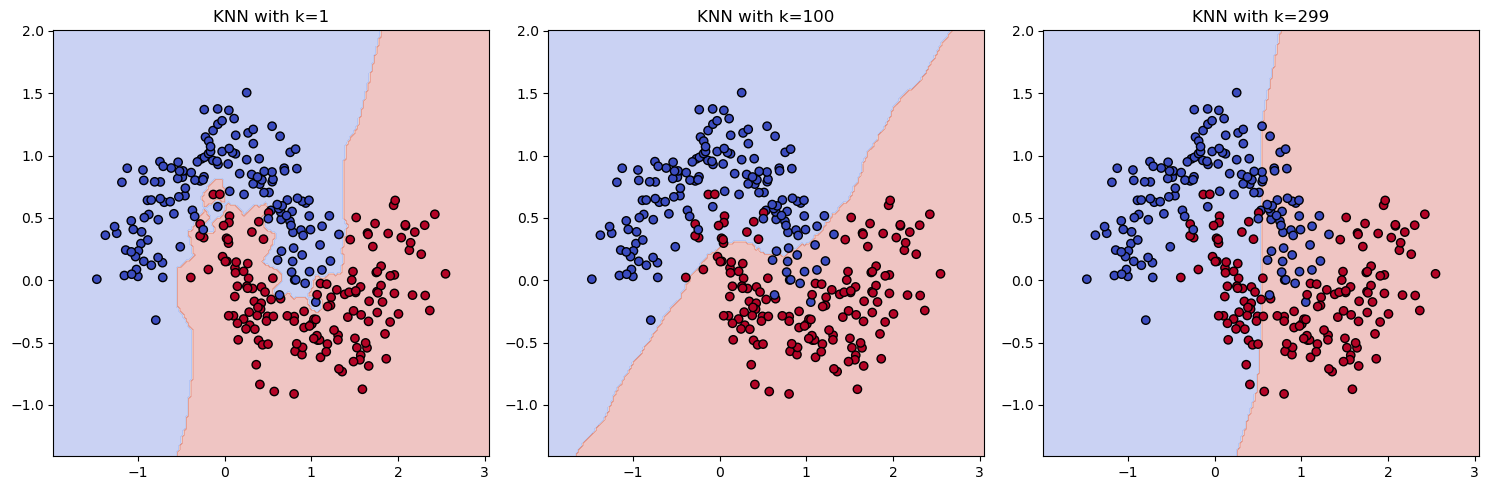

In [57]:
from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

# Generate a toy dataset (two moons dataset)
X, y = make_moons(n_samples=300, noise=0.2, random_state=42)

# Define k values to visualise
k_values = [1, 100, 299]

# Create subplots
fig, axes = plt.subplots(1, len(k_values), figsize=(15, 5))

# Generate a meshgrid for decision boundary plotting
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

# Plot decision boundaries for different k values
for i, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    
    # Predict class for each point in the meshgrid
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    axes[i].contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    axes[i].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors="k")
    axes[i].set_title(f"KNN with k={k}")
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)

plt.tight_layout()
plt.show()


### Training and Validation Sets
##### Splitting Data
- Divide the dataset into three subsets:
    - Training Set: Used to train the KNN model.
    - Validation Set: Used to evaluate different $k$ values and select the best one.
    - Test Set: An independent set used to estimate the final model's generalisation performance.
##### Finding the Best k
- Train the KNN model on the training set for multiple values of $k$.
- Evaluate the performance using the validation set.
- Choose the $k$ with the lowest validation error.
##### Avoiding Bias from the Validation Set
- Since the validation set is used for model selection, the chosen $k$ is indirectly influenced by it.
- This can introduce bias, leading to an overly optimistic estimate of performance.
##### Final Model Evaluation with the Test Set
- After selecting k, the model is not retrained on the test set.
- The test set is used only once to get an unbiased estimate of real-world performance.

### Curse of Dimensionality and K-Nearest Neighbors (KNN)
#### Overview
The **curse of dimensionality** refers to the phenomenon where the structure of data changes drastically as the number of dimensions increases. For machine learning methods like **K-Nearest Neighbors (KNN)**, which rely on distance metrics, high-dimensional spaces pose significant challenges. Some specific examples are:
- **Distance**: In high-dimensional spaces, the distance between points tends to become more uniform. This means that, as you increase the number of dimensions, the relative difference between the "nearest" and "farthest" neighbors diminishes.
- **Sparsity**: As the number of dimensions increases, the volume of the space grows exponentially. Even if you have a large dataset, the points are spread out much more thinly across the high-dimensional space.
- **Complexity**: As the number of dimensions increases, the computational cost of calculating distances between all pairs of points increases as well.
- **Overfitting**: High-dimensional spaces tend to have a lot of noise or irrelevant features that may lead to overfitting. KNN is particularly susceptible because it essentially memorises the training data. In high dimensions, there is a risk that the algorithm will memorise noise rather than underlying patterns in the data.
#### Concept of Hypercube
Consider a **unit hypercube** in $d$ dimensions. A hypercube is the $d$-dimensional generalisation of a square (2D) and cube (3D). For example:
- In 1 dimension, the hypercube is a line segment from $[0,1]$.
- In 2 dimensions, it is a square $[0, 1]^2$.
- In 3 dimensions, it is a cube $[0, 1]^3$.
The volume of a unit hypercube in $d$ dimensions is simply:
$$
\text{Volume of hypercube} = 1^d = 1
$$
However, when the number of dimensions increases, the **volume of a hypercube** grows exponentially in relation to the number of dimensions.
##### Edge Length of Hypercube
In a $d$-dimensional hypercube, if we define a "half-unit" hypercube, we are looking for a cube whose edge length is $m = 0.5$ in each dimension. We can use the edge length to understand the geometric relationships between points in high-dimensional spaces.
#### The Curse of Dimensionality and K-Nearest Neighbors (KNN)
##### Key Issue
- As the number of dimensions $d$ increases, the **distance** between points becomes more similar. This can make it harder to determine which points are the "nearest" neighbors to a test point. In the context of KNN, this means that the algorithm struggles to distinguish between points that are truly close and those that are far away, thus reducing the effectiveness of the method in high-dimensional spaces.
- For example, when we look at the **k-nearest neighbors** in a high-dimensional space:
    - In **lower dimensions**, distances between points are more spread out, so it's easier to find truly close neighbors.
    - In **higher dimensions**, the distance between all points becomes more similar, making it difficult for KNN to correctly identify close neighbors.
##### Problem Setup
We consider the case where we sample **1000 points** uniformly from a unit hypercube in $d$ dimensions. We then select a **random test point** and find the minimum volume hypercube that contains the **k nearest neighbors** to this test point. The edge length of this hypercube is denoted by $m$.
##### Formula for $m$
We know that the edge length of the hypercube containing the $k$ nearest neighbors is given by the formula:
$$
m \approx \left(\frac{k}{1000}\right)^{\frac{1}{d}}
$$
where:
- $k$ is the number of nearest neighbors (e.g., $k = 10$),
- $1000$ is the number of points sampled,
- $d$ is the number of dimensions.
##### Behavior as $d$ Increases
As $d$ increases, $m$ will change. Specifically:
- When $d$ is small, $m$ is smaller, and the neighbors are more clustered.
- As $d$ increases, the volume of the hypercube grows, and the points become more spread out.
For example, let's calculate the edge length $m$ in two scenarios:
##### Scenario 1: $d = 10$ and $k = 10$
Using the formula:
$$
m \approx \left(\frac{10}{1000}\right)^{\frac{1}{10}} \approx 0.63095
$$
Thus, the edge length of the minimum volume hypercube containing 10 nearest neighbors in 10 dimensions is approximately **0.631**.
##### Scenario 2: $d = 500$ and $k = 10$
For $d = 500$ and $k = 10$:
$$
m \approx \left(\frac{10}{1000}\right)^{\frac{1}{500}} \approx 0.9908
$$
Thus, the edge length of the minimum volume hypercube containing 10 nearest neighbors in 500 dimensions is approximately **0.991**.
#### Key Insight: Curse of Dimensionality in KNN
In the previous scenarios, we saw how the edge length $m$ changes as the number of dimensions increases:
- For lower-dimensional settings, the neighbors are relatively close to the test point.
- In higher-dimensional settings (e.g., $d = 500$), even the closest neighbors are far away, making the KNN method less effective.
#### Main Issue
When $d$ increases, even the closest neighbors can be quite far from the test point, which breaks our intuition based on lower-dimensional spaces. In high dimensions, distances between points become less distinguishable, and it becomes harder to find the true nearest neighbors. This is the **curse of dimensionality** and is a key challenge when using KNN in high-dimensional data.
#### How Many Training Instances Are Needed?
Now, let's calculate how many training instances we would need to ensure that a half-unit hypercube ($m = 0.5$) can contain the 10 nearest neighbors in **500 dimensions**.
Using the formula:
$$
m \approx \left(\frac{k}{n}\right)^{\frac{1}{d}}
$$
where:
- $m = 0.5$,
- $k = 10$,
- $d = 500$,
- $n$ is the number of training instances.
We solve for $n$:
$$
0.5 \approx \left(\frac{10}{n}\right)^{\frac{1}{500}}
$$
Taking the natural logarithm of both sides:
$$
\ln(0.5) \approx \frac{1}{500} \ln\left( \frac{10}{n} \right)
$$
Solving for $n$, we find that the number of training instances \( n \) must be extremely large to achieve the desired edge length of 0.5 in 500 dimensions, making it computationally infeasible without a vast number of training points.
#### Conclusion
The **curse of dimensionality** severely impacts the **K-Nearest Neighbors (KNN)** algorithm as the number of dimensions increases. In higher dimensions, even the nearest neighbors become spread out, making it difficult to find true "neighbors." The distance metrics that KNN relies on lose their effectiveness, and an exponentially larger number of instances is needed to maintain the same quality of nearest neighbor search.

#### k-NN for Regression
- We can also use KNN for regression, with some minor changes to the method we have discussed previously:
    - Instead of selecting the majority vote for the k-NN, we selecte the average
    - Instead of selecting the model with the lowest classification score, we use a regression measure instead, such as RMSE

#### Steps of k-NN 
- Load data split into test train validate
- Choose distance metric
- Need to standardise whenever distance is used, that is mean = 0 and std = 1
- Feature scaling for each (test, train and validate)
- Run the model for a range of K values and calculate RMSE/Recall/F1 etc to find optimal
- Validate and test

#### k-NN Advantages
- Very simple but often surprisingly effective.
- Fast training phase (just need to store the training set).
- Non-parametric approach that can make use of large amounts of data.
#### k-NN Disadvantages
- Does not produce a model that offers insights into the relationship between features and response.
- Slow classification phase (requires determination of k-nearest neighbours) — it is called a lazy learner.
- Requires a choice of suitable $k$.
- Preprocessing required for scaling, binary/categorical features and missing values.